# Packetized Machine Learning in Support Vector Machines

It's mandatory to have the PacketizedPackage developed for this research in the project to run the simulations. Please check the module of PacketizePackage in order to understand the different functions used in this script. Tested with Python 2.7.11 and Scikit-learn 0.19.0

Necessary imports and configurations:

In [1]:
# Necessary imports.
# Alternative for timeit: import time and use time.clock() or time.time() for Python >= 3.3

from PacketizedPackage import PacketizedModule as pck
from timeit import default_timer as timer
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

The simulations will be performed with synthetic data, however, an existing dataset can be used:

In [ ]:
#X = []
#Y = []

#for line in open('dataset.dat', 'r'):
#    item = np.asarray(line.strip().split(","))
#    X.append(item[:-1])
#    Y.append((item[-1]))

#X = np.array(X, 'float')
#Y = np.array(Y)

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2)

For the generation of the synthetic data 3 scenarios have been definded by default. The scenario A represents the best scenario with a dataset of two classes, 100 informative features, 0 noisy features and one cluster per class. The scenario B represents the intermediate one with a dataset of two classes, 4 informative features, 96 noisy features, two clusters per class and a 10% of samples whose class are randomly exchanged. Finally, the scenario C represents the worst scenario with a dataset of four classes, 4 informative features, 96 noisy features, two clusters per class and a 10% of samples whose class are randomly exchanged.

### Comparison of training and predicting times and Area Under the ROC Curve with a SVM classifier using the Packetized technique regarding to the number of packets.

In case of a multi-class dataset the accuracy score is computed instead of the AUC-ROC.

Set the variables:

In [2]:
scenario = 'a'
samples = 10000
plt_packets = [2, 4, 8, 16, 32, 64, 128, 256]

Run the simulation:

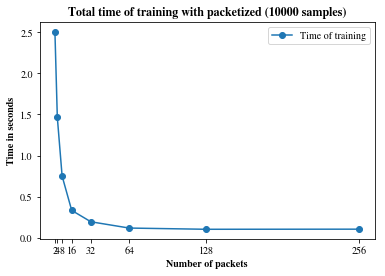

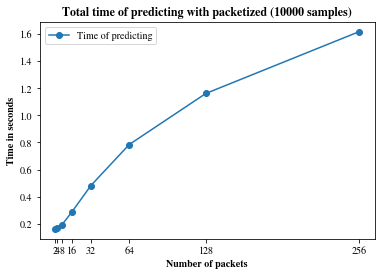

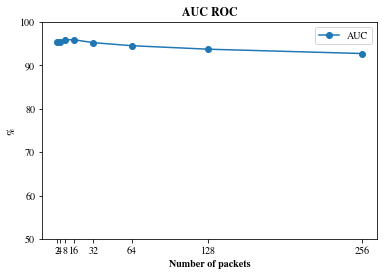

In [3]:
plt_total_times_training_packetized = []
plt_total_times_predicting_packetized = []
plt_total_auc_packetized = []
plt_total_score_packetized = []

# Generate a synthetic dataset.

# Scenario A
if scenario is 'a':
    X_train, X_test, Y_train, Y_test = pck.create_training_testing_dataset(samples, 100, 100, 0, 0, 2, 1,
                                                                           1, 0, test_size=.2)

# Scenario B
if scenario is 'b':
    X_train, X_test, Y_train, Y_test = pck.create_training_testing_dataset(samples, 100, 4, 0, 0, 2,
                                                                           2, 1, 0.1, test_size=.2)

# Scenario C
if scenario is 'c':
    X_train, X_test, Y_train, Y_test = pck.create_training_testing_dataset(samples, 100, 4, 0, 0, 4,
                                                                           2, 1, 0.1, test_size=.2)

for packets in plt_packets:

    tic_training_packetized = timer()
    models = pck.train_packetized(X_train, Y_train, packets=packets)
    toc_training_packetized = timer()
    total_time_training_packetized = toc_training_packetized - tic_training_packetized
    plt_total_times_training_packetized.append(total_time_training_packetized)

    tic_predicting_packetized = timer()
    Y_pred = pck.predict_packetized(models, X_test)
    toc_predicting_packetized = timer()
    total_time_predicting_packetized = toc_predicting_packetized - tic_predicting_packetized
    plt_total_times_predicting_packetized.append(total_time_predicting_packetized)

    if scenario is 'c':
        plt_total_score_packetized.append(accuracy_score(Y_test, Y_pred)*100)
    else:
        plt_total_auc_packetized.append(roc_auc_score(Y_test, Y_pred)*100)

plt.figure()
plt.xlabel('Number of packets', weight='bold')
plt.ylabel('Time in seconds', weight='bold')
plt.title(r'Total time of training with packetized ('+str(samples)+' samples)', weight='bold')
plt.plot(plt_packets, plt_total_times_training_packetized, marker='o', label="Time training with packetized")
plt.xticks(plt_packets)
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend(['Time of training'])

plt.figure()
plt.xlabel('Number of packets', weight='bold')
plt.ylabel('Time in seconds', weight='bold')
plt.title(r'Total time of predicting with packetized ('+str(samples)+' samples)', weight='bold')
plt.plot(plt_packets, plt_total_times_predicting_packetized, marker='o', label="Time predicting with packetized")
plt.xticks(plt_packets)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend(['Time of predicting'])

if scenario is 'c':
    plt.figure()
    plt.xlabel('Number of packets', weight='bold')
    plt.ylabel('%', weight='bold')
    plt.title(r'Accuracy score', weight='bold')
    plt.plot(plt_packets, plt_total_score_packetized, marker='o', label="Accuracy score")
    # plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.xticks(plt_packets)
    axes = plt.gca()
    # axes.set_xlim([xmin,xmax])
    axes.set_ylim([50, 100])
    plt.legend(['Accuracy score'])
    plt.show()
else:
    plt.figure()
    plt.xlabel('Number of packets', weight='bold')
    plt.ylabel('%', weight='bold')
    plt.title(r'AUC ROC', weight='bold')
    plt.plot(plt_packets, plt_total_auc_packetized, marker='o', label="AUC ROC")
    # plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.xticks(plt_packets)
    axes = plt.gca()
    # axes.set_xlim([xmin,xmax])
    axes.set_ylim([50, 100])
    plt.legend(['AUC'])
    plt.show()

### Comparison of training and predicting times and AUC with a SVM classifier using and without using the Packetized technique.

Set the variables:

In [4]:
scenario = 'a'
packets = 8
plt_samples = [10e+1, 10e+2, 10e+3]

Run the simulation:

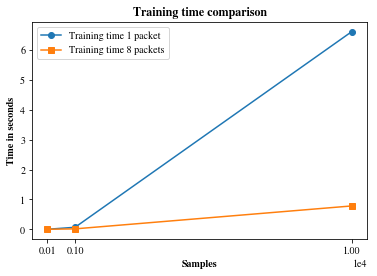

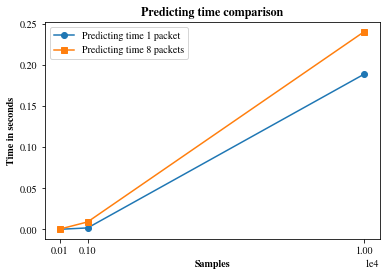

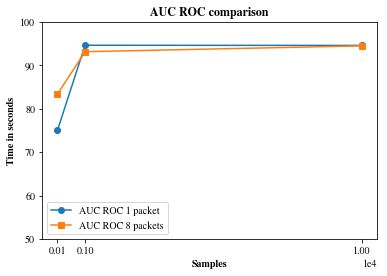

In [5]:
plt_total_times_training_normal = []
plt_total_times_training_packetized = []

for samples in plt_samples:

    # Scenario A
    if scenario is 'a':
        X_train, Y_train = pck.create_only_training_dataset(samples, 100, 100, 0, 0, 2, 1, 1, 0)

    # Scenario B
    if scenario is 'b':
        X_train, Y_train = pck.create_only_training_dataset(samples, 100, 4, 0, 0, 2, 2, 1, 0.1)

    # Scenario C
    if scenario is 'c':
        X_train, Y_train = pck.create_only_training_dataset(samples, 100, 4, 0, 0, 4, 2, 1, 0.1)

    tic_training_normal = timer()
    clf = pck.train(X_train, Y_train, False, 'linear')
    toc_training_normal= timer()
    total_time_training_normal = toc_training_normal - tic_training_normal
    plt_total_times_training_normal.append(total_time_training_normal)

    tic_training_packetized = timer()
    clf_packetized = pck.train_packetized(X_train, Y_train, packets, False, 'linear')
    toc_training_packetized = timer()
    total_time_training_packetized = toc_training_packetized - tic_training_packetized
    plt_total_times_training_packetized.append(total_time_training_packetized)

plt.figure()
plt.xlabel('Samples', weight='bold')
plt.ylabel('Time in seconds', weight='bold')
plt.title(r'Training time comparison', weight='bold')
plt.plot(plt_samples, plt_total_times_training_normal, marker='o', label="Time training normal")
plt.plot(plt_samples, plt_total_times_training_packetized, marker='s', label="Time training with packetized")
plt.xticks(plt_samples)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(['Training time 1 packet', 'Training time '+str(packets)+' packets'])


plt_total_times_training_normal = []
plt_total_times_training_packetized = []
plt_total_times_predicting_normal = []
plt_total_times_predicting_packetized = []
plt_total_auc_normal = []
plt_total_auc_packetized = []
plt_total_score_normal = []
plt_total_score_packetized = []


for samples in plt_samples:

    # Scenario A
    if scenario is 'a':
        X_train, X_test, Y_train, Y_test = pck.create_training_testing_dataset(samples, 100, 100, 0, 0, 2, 1,
                                                                               1, 0, test_size=.2)

    # Scenario B
    if scenario is 'b':
        X_train, X_test, Y_train, Y_test = pck.create_training_testing_dataset(samples, 100, 4, 0, 0, 2,
                                                                               2, 1, 0.1, test_size=.2)

    # Scenario C
    if scenario is 'c':
        X_train, X_test, Y_train, Y_test = pck.create_training_testing_dataset(samples, 100, 4, 0, 0, 4,
                                                                               2, 1, 0.1, test_size=.2)

    tic_training_normal = timer()
    clf = pck.train(X_train, Y_train, False, 'linear')
    toc_training_normal = timer()
    total_time_training_normal = toc_training_normal - tic_training_normal
    plt_total_times_training_normal.append(total_time_training_normal)

    tic_training_packetized = timer()
    models = pck.train_packetized(X_train, Y_train, packets, False, 'linear')
    toc_training_packetized = timer()
    total_time_training_packetized = toc_training_packetized - tic_training_packetized
    plt_total_times_training_packetized.append(total_time_training_packetized)

    tic_predicting_normal = timer()
    Y_pred = pck.predict(clf, X_test)
    toc_predicting_normal = timer()
    total_time_predicting_normal = toc_predicting_normal - tic_predicting_normal
    plt_total_times_predicting_normal.append(total_time_predicting_normal)

    tic_predicting_packetized = timer()
    Y_pred_packetized = pck.predict_packetized(models, X_test)
    toc_predicting_packetized = timer()
    total_time_predicting_packetized = toc_predicting_packetized - tic_predicting_packetized
    plt_total_times_predicting_packetized.append(total_time_predicting_packetized)

    if scenario is 'c':
        plt_total_score_normal.append(accuracy_score(Y_test, Y_pred)*100)
        plt_total_score_packetized.append(accuracy_score(Y_test, Y_pred_packetized)*100)
    else:
        plt_total_auc_normal.append(roc_auc_score(Y_test, Y_pred)*100)
        plt_total_auc_packetized.append(roc_auc_score(Y_test, Y_pred_packetized)*100)

plt.figure()
plt.xlabel('Samples', weight='bold')
plt.ylabel('Time in seconds', weight='bold')
plt.title(r'Predicting time comparison', weight='bold')
plt.plot(plt_samples, plt_total_times_predicting_normal, marker='o', label="Time predicting normal")
plt.plot(plt_samples, plt_total_times_predicting_packetized, marker='s', label="Time predicting with packetized")
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xticks(plt_samples)
plt.legend(['Predicting time 1 packet','Predicting time '+str(packets)+' packets'])


if scenario is 'c':
    plt.figure()
    plt.xlabel('Samples', weight='bold')
    plt.ylabel('%', weight='bold')
    plt.title(r'Accuracy score comparison', weight='bold')
    plt.plot(plt_samples, plt_total_score_normal, marker='o', label="Accuracy score normal")
    plt.plot(plt_samples, plt_total_score_packetized, marker='s', label="Accuracy score packetized")
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    plt.xticks(plt_samples)
    axes = plt.gca()
    # axes.set_xlim([xmin,xmax])
    axes.set_ylim([50, 100])
    plt.legend(['Accuracy score 1 packet', 'Accuracy score '+str(packets)+' packets'])
    plt.show()
else:
    plt.figure()
    plt.xlabel('Samples', weight='bold')
    plt.ylabel('%', weight='bold')
    plt.title(r'AUC ROC comparison', weight='bold')
    plt.plot(plt_samples, plt_total_auc_normal, marker='o', label="AUC ROC normal")
    plt.plot(plt_samples, plt_total_auc_packetized, marker='s', label="AUC ROC with packetized")
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.xticks(plt_samples)
    axes = plt.gca()
    # axes.set_xlim([xmin,xmax])
    axes.set_ylim([50, 100])
    plt.legend(['AUC ROC 1 packet', 'AUC ROC '+str(packets)+' packets'])
    plt.show()

### Comparison of training times with a SVM classifier using the Packetized technique regarding to the number of features of the dataset. 

Set the variables:

In [6]:
samples = 10000
packets = 8
plt_features = [1, 10e+0, 10e+1, 10e+2]

Run the simulation:

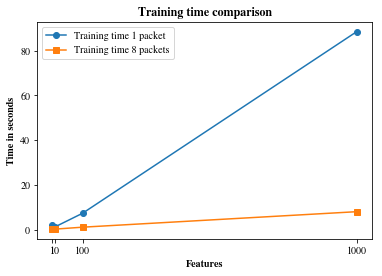

In [7]:
plt_total_times_training_normal = []
plt_total_times_training_packetized = []

for features in plt_features:

    X_train, Y_train = pck.create_only_training_dataset(samples, features, features, 0, 0, 2, 1, 1, 0)

    tic_training_normal = timer()
    clf = pck.train(X_train, Y_train, False, 'linear')
    toc_training_normal= timer()
    total_time_training_normal = toc_training_normal - tic_training_normal
    plt_total_times_training_normal.append(total_time_training_normal)

    tic_training_packetized = timer()
    clf_packetized = pck.train_packetized(X_train, Y_train, packets, False, 'linear')
    toc_training_packetized = timer()
    total_time_training_packetized = toc_training_packetized - tic_training_packetized
    plt_total_times_training_packetized.append(total_time_training_packetized)

plt.figure()
plt.xlabel('Features', weight='bold')
plt.ylabel('Time in seconds', weight='bold')
plt.title(r'Training time comparison', weight='bold')
plt.plot(plt_features, plt_total_times_training_normal, marker='o', label="Time training normal")
plt.plot(plt_features, plt_total_times_training_packetized, marker='s', label="Time training with packetized")
plt.xticks(plt_features)
plt.legend(['Training time 1 packet', 'Training time '+str(packets)+' packets'])
plt.show()

### Comparison of training and predicting times and AUC with a SVM classifier using the Packetized technique and Bagging.

Set the variables:

In [2]:
scenario = 'a'
packets = 8
plt_samples = [10e+1, 10e+2, 10e+3]

Run the simulation:

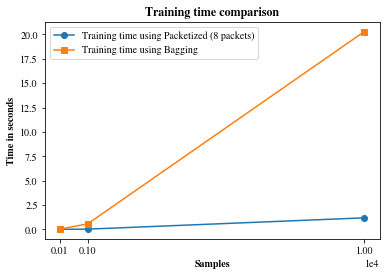

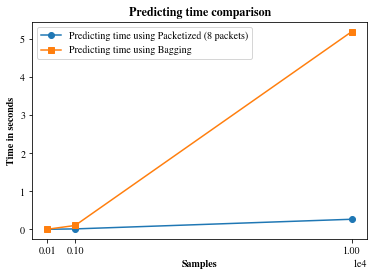

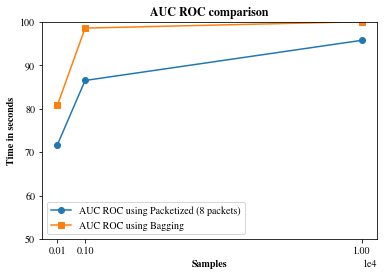

In [5]:
plt_total_times_training_packetized = []
plt_total_times_training_bagging = []

for samples in plt_samples:

    # Scenario A
    if scenario is 'a':
        X_train, Y_train = pck.create_only_training_dataset(samples, 100, 100, 0, 0, 2, 1, 1, 0)

    # Scenario B
    if scenario is 'b':
        X_train, Y_train = pck.create_only_training_dataset(samples, 100, 4, 0, 0, 2, 2, 1, 0.1)

    # Scenario C
    if scenario is 'c':
        X_train, Y_train = pck.create_only_training_dataset(samples, 100, 4, 0, 0, 4, 2, 1, 0.1)

    tic_training_packetized = timer()
    clf_packetized = pck.train_packetized(X_train, Y_train, packets, False, 'linear')
    toc_training_packetized = timer()
    total_time_training_packetized = toc_training_packetized - tic_training_packetized
    plt_total_times_training_packetized.append(total_time_training_packetized)

    tic_training_bagging = timer()
    clf_bagging = pck.train_bagging(X_train, Y_train)
    toc_training_bagging = timer()
    total_time_training_bagging = toc_training_bagging - tic_training_bagging
    plt_total_times_training_bagging.append(total_time_training_bagging)

plt.figure()
plt.xlabel('Samples', weight='bold')
plt.ylabel('Time in seconds', weight='bold')
plt.title(r'Training time comparison', weight='bold')
plt.plot(plt_samples, plt_total_times_training_packetized, marker='o', label="Time training with packetized")
plt.plot(plt_samples, plt_total_times_training_bagging, marker='s', label="Time training with bagging")
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xticks(plt_samples)
plt.legend(['Training time using Packetized ('+str(packets)+' packets)', 'Training time using Bagging'])


plt_total_times_training_bagging = []
plt_total_times_training_packetized = []
plt_total_times_predicting_bagging = []
plt_total_times_predicting_packetized = []
plt_total_auc_bagging = []
plt_total_auc_packetized = []
plt_total_score_bagging = []
plt_total_score_packetized = []

for samples in plt_samples:

    # Scenario A
    if scenario is 'a':
        X_train, X_test, Y_train, Y_test = pck.create_training_testing_dataset(samples, 100, 100, 0, 0, 2, 1,
                                                                               1, 0, test_size=.2)

    # Scenario B
    if scenario is 'b':
        X_train, X_test, Y_train, Y_test = pck.create_training_testing_dataset(samples, 100, 4, 0, 0, 2,
                                                                               2, 1, 0.1, test_size=.2)

    # Scenario C
    if scenario is 'c':
        X_train, X_test, Y_train, Y_test = pck.create_training_testing_dataset(samples, 100, 4, 0, 0, 4,
                                                                               2, 1, 0.1, test_size=.2)

    tic_training_packetized = timer()
    models = pck.train_packetized(X_train, Y_train, packets, False, 'linear')
    toc_training_packetized = timer()
    total_time_training_packetized = toc_training_packetized - tic_training_packetized
    plt_total_times_training_packetized.append(total_time_training_packetized)

    tic_training_bagging = timer()
    clf_bagging = pck.train_bagging(X_train, Y_train)
    toc_training_bagging = timer()
    total_time_training_bagging = toc_training_bagging - tic_training_bagging
    plt_total_times_training_bagging.append(total_time_training_bagging)

    tic_predicting_packetized = timer()
    Y_pred_packetized = pck.predict_packetized(models, X_test)
    toc_predicting_packetized = timer()
    total_time_predicting_packetized = toc_predicting_packetized - tic_predicting_packetized
    plt_total_times_predicting_packetized.append(total_time_predicting_packetized)

    tic_predicting_bagging = timer()
    Y_pred_bagging = pck.predict(clf_bagging, X_test)
    toc_predicting_bagging = timer()
    total_time_predicting_bagging = toc_predicting_bagging - tic_predicting_bagging
    plt_total_times_predicting_bagging.append(total_time_predicting_bagging)

    if scenario is 'c':
        plt_total_score_packetized.append(accuracy_score(Y_test, Y_pred_packetized)*100)
        plt_total_score_bagging.append(accuracy_score(Y_test, Y_pred_bagging)*100)
    else:
        plt_total_auc_packetized.append(roc_auc_score(Y_test, Y_pred_packetized)*100)
        plt_total_auc_bagging.append(roc_auc_score(Y_test, Y_pred_bagging)*100)

plt.figure()
plt.xlabel('Samples', weight='bold')
plt.ylabel('Time in seconds', weight='bold')
plt.title(r'Predicting time comparison', weight='bold')
plt.plot(plt_samples, plt_total_times_predicting_packetized, marker='o', label="Time predicting packetized")
plt.plot(plt_samples, plt_total_times_predicting_bagging, marker='s', label="Time predicting with bagging")
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xticks(plt_samples)
plt.legend(['Predicting time using Packetized ('+str(packets)+' packets)', 'Predicting time using Bagging'])


if scenario is 'c':
    plt.figure()
    plt.xlabel('Samples', weight='bold')
    plt.ylabel('%', weight='bold')
    plt.title(r'Accuracy score comparison', weight='bold')
    plt.plot(plt_samples, plt_total_score_packetized, marker='o', label="Accuracy score packetized")
    plt.plot(plt_samples, plt_total_score_bagging, marker='s', label="Accuracy score bagging")
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    plt.xticks(plt_samples)
    axes = plt.gca()
    # axes.set_xlim([xmin,xmax])
    axes.set_ylim([50, 100])
    plt.legend(['Accuracy score using Packetized ('+str(packets)+' packets)', 'Accuracy score using Bagging'])
    plt.show()
else:
    plt.figure()
    plt.xlabel('Samples', weight='bold')
    plt.ylabel('%', weight='bold')
    plt.title(r'AUC ROC comparison', weight='bold')
    plt.plot(plt_samples, plt_total_auc_packetized, marker='o', label="AUC ROC packetized")
    plt.plot(plt_samples, plt_total_auc_bagging, marker='s', label="AUC ROC with bagging")
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.xticks(plt_samples)
    axes = plt.gca()
    # axes.set_xlim([xmin,xmax])
    axes.set_ylim([50, 100])
    plt.legend(['AUC ROC using Packetized ('+str(packets)+' packets)', 'AUC ROC using Bagging'])
    plt.show()